# Table of Contents
 <p><div class="lev1"><a href="#Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></div><div class="lev2"><a href="#Dynamic-Network-Analysis-of-Enron-Email-Network-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dynamic Network Analysis of Enron Email Network Data</a></div><div class="lev2"><a href="#Data-Preprocessing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Preprocessing</a></div><div class="lev2"><a href="#Key-Assumption-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Key Assumption</a></div><div class="lev1"><a href="#Import-Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Libraries</a></div><div class="lev1"><a href="#Import-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import Data</a></div><div class="lev1"><a href="#Data-Partition-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Partition</a></div><div class="lev2"><a href="#Break-data-into-years-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Break data into years</a></div><div class="lev2"><a href="#Create-networks-at-different-timesteps-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Create networks at different timesteps</a></div><div class="lev3"><a href="#t-=-0-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>t = 0</a></div><div class="lev3"><a href="#t-=1-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>t =1</a></div><div class="lev3"><a href="#t-=-2-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>t = 2</a></div><div class="lev3"><a href="#t-=-3-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>t = 3</a></div><div class="lev3"><a href="#t-=-4-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>t = 4</a></div><div class="lev3"><a href="#t-=-5-4.2.6"><span class="toc-item-num">4.2.6&nbsp;&nbsp;</span>t = 5</a></div><div class="lev1"><a href="#Network-Statistics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Network Statistics</a></div><div class="lev2"><a href="#Centrality-analysis-without-averaging-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Centrality analysis without averaging</a></div><div class="lev3"><a href="#Calculate-all-centralities-in-one-go-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span><strong>Calculate all centralities in one go</strong></a></div><div class="lev3"><a href="#Degree-Centrality-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Degree Centrality</a></div><div class="lev3"><a href="#Eigenvector-Centrality-Histograms-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Eigenvector Centrality Histograms</a></div><div class="lev3"><a href="#Closeness-Centrality-Histograms-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Closeness Centrality Histograms</a></div><div class="lev3"><a href="#Betweenness-Centrality-Histogram-5.1.5"><span class="toc-item-num">5.1.5&nbsp;&nbsp;</span>Betweenness Centrality Histogram</a></div><div class="lev3"><a href="#Communicability-Centrality-Histograms-5.1.6"><span class="toc-item-num">5.1.6&nbsp;&nbsp;</span>Communicability Centrality Histograms</a></div><div class="lev3"><a href="#Katz-Centrality-Histograms-5.1.7"><span class="toc-item-num">5.1.7&nbsp;&nbsp;</span>Katz Centrality Histograms</a></div><div class="lev3"><a href="#Load-Centrality-5.1.8"><span class="toc-item-num">5.1.8&nbsp;&nbsp;</span>Load Centrality</a></div><div class="lev2"><a href="#Centrality-Analysis-with-averaging-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Centrality Analysis with averaging</a></div><div class="lev3"><a href="#Calculate-Centrality-Statistics-at-different-time-steps-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Calculate Centrality Statistics at different time steps</a></div><div class="lev1"><a href="#Assortativity-Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Assortativity Analysis</a></div>

# Introduction

## Dynamic Network Analysis of Enron Email Network Data

I use the Enron email network data from [John Hopkins](http://cis.jhu.edu/~parky/Enron/enron.html) which has time, sender and receiver pair format data.

## Data Preprocessing

From the JHU data, I have done the following in Excel:
- The first column represents seconds elapsed since 1 January 1970, so I convert this in to days
- I then add these days to the date to get time stamps for all nodes
- From the timestamps, I extract the year field
- The network can be partitioned by year in a cumulative manner for DNA

## Key Assumption

The key assumptio in this analysis is that the nodes can be appended to the original network at time, t0 with the new nodes from time, t+1.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
%matplotlib inline
sns.set(style="whitegrid", color_codes=True, context='paper')
import random
random.seed(1111111111111)
plt.rc('axes', grid=False, titlesize='large', labelsize='medium',labelweight='heavy')
plt.rc('lines', linewidth=4)
plt.rc('font',family='serif',size=12, serif='Georgia')
plt.rc('figure', figsize = (15,6),titlesize='large',titleweight='heavy')
plt.rc('grid',linewidth=3)
sns.set_palette('cubehelix')
from scipy.signal import *
from numpy.linalg import *

# Import Data

In [2]:
data = pd.read_excel("../Data/execs.email.linesnum.xlsx")

In [3]:
data.head()

,sec,to,from,date,year
0,315522000,24,153,1979-12-31 21:00:00,1979
1,315522000,24,153,1979-12-31 21:00:00,1979
2,315522000,29,29,1979-12-31 21:00:00,1979
3,315522000,29,29,1979-12-31 21:00:00,1979
4,315522000,29,29,1979-12-31 21:00:00,1979


In [4]:
data.min()

sec               315522000
to                        0
from                      0
date    1979-12-31 21:00:00
year                   1979
dtype: object

In [5]:
data.max()

sec              1024688419
to                      183
from                    183
date    2002-06-21 19:40:19
year                   2002
dtype: object

# Data Partition

In [6]:
#year = data['year'].unique()
year = sorted(set(data['year']))
year

[1979, 1998, 1999, 2000, 2001, 2002]

In [7]:
sorted(set(data['year']))

[1979, 1998, 1999, 2000, 2001, 2002]

In [8]:
data.drop(["sec", "date"], axis=1,inplace=True)

In [9]:
data.head()

,to,from,year
0,24,153,1979
1,24,153,1979
2,29,29,1979
3,29,29,1979
4,29,29,1979


## Break data into years

In [10]:
G0 = data[data["year"]==year[0]]
G1 = data[data["year"]==year[1]]
G2 = data[data["year"]==year[2]]
G3 = data[data["year"]==year[3]]
G4 = data[data["year"]==year[4]]
G5 = data[data["year"]==year[5]]

In [11]:
G1.size,G1.shape

(246, (82, 3))

In [12]:
G2.size,G1.shape

(11145, (82, 3))

In [13]:
G3.size,G1.shape

(132177, (82, 3))

In [14]:
G3.size,G1.shape

(132177, (82, 3))

In [15]:
G4.size,G1.shape

(206664, (82, 3))

In [16]:
G5.size,G1.shape

(25473, (82, 3))

In [17]:
G1.head()

,to,from,year
174,114,169,1998
175,114,169,1998
176,114,123,1998
177,114,123,1998
178,114,123,1998


In [18]:
G1.tail()

,to,from,year
251,112,65,1998
252,112,114,1998
253,112,114,1998
254,112,145,1998
255,112,145,1998


In [19]:
G2.head()

,to,from,year
256,114,65,1999
257,114,65,1999
258,114,169,1999
259,114,169,1999
260,114,112,1999


In [20]:
G3.head()

,to,from,year
3971,82,51,2000
3972,82,51,2000
3973,82,51,2000
3974,82,51,2000
3975,82,51,2000


## Create networks at different timesteps

### t = 0

In [21]:
G0_ = np.asarray(G0.ix[:,:2])
Gt0 = nx.Graph()
Gt0= nx.from_edgelist(G0_)

### t =1

In [22]:
G1_ = G1.ix[:,:2]
G1_ = np.concatenate((G1_,G0_), axis=0)
Gt1 = nx.Graph()
Gt1= nx.from_edgelist(G1_)

### t = 2

In [23]:
G2_ = G2.ix[:,:2]
G2_ = np.concatenate((G2_,G1_), axis=0)
Gt2 = nx.Graph()
Gt2= nx.from_edgelist(G2_)

### t = 3

In [24]:
G3_ = G3.ix[:,:2]
G3_ = np.concatenate((G3_,G2_), axis=0)
Gt3 = nx.Graph()
Gt3= nx.from_edgelist(G3_)

### t = 4

In [25]:
G4_ = G4.ix[:,:2]
G4_ = np.concatenate((G4_,G3_), axis=0)
Gt4 = nx.Graph()
Gt4= nx.from_edgelist(G4_)

### t = 5

In [26]:
G5_ = G5.ix[:,:2]
G5_ = np.concatenate((G5_,G4_), axis=0)
Gt5 = nx.Graph()
Gt5= nx.from_edgelist(G5_)

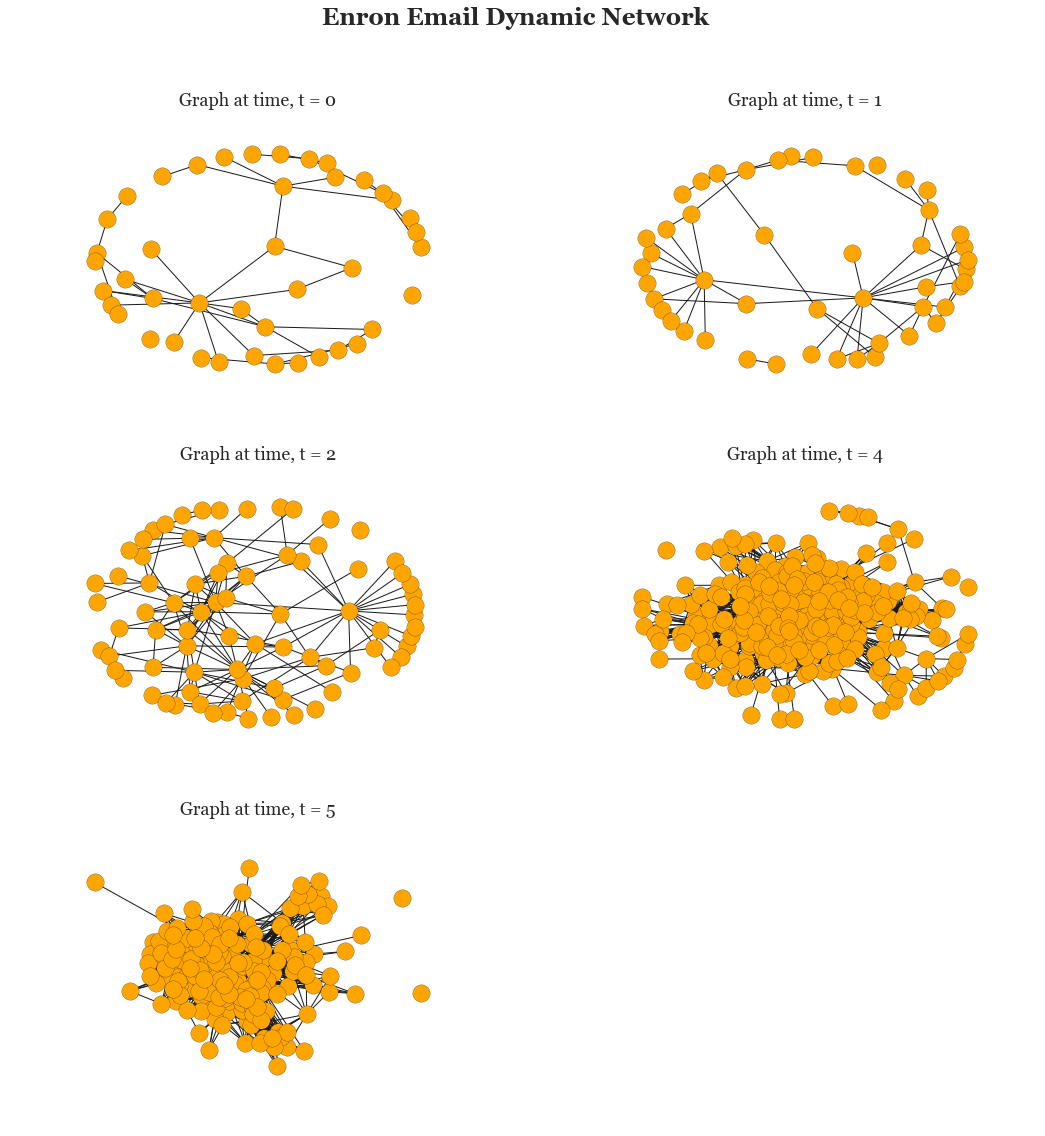

In [27]:
#Plot graphs together
plt.figure(figsize=(18,18))
plt.suptitle('Enron Email Dynamic Network', fontsize=24)
plt.subplot(321)
nx.draw_spring(Gt0, cmap=plt.cm.inferno, node_color='#FFA500')
plt.title("Graph at time, t = 0", fontsize=18)

plt.subplot(322)
nx.draw_spring(Gt1, cmap=plt.cm.inferno, node_color='#FFA500')
plt.title("Graph at time, t = 1", fontsize=18)

plt.subplot(323)
nx.draw_spring(Gt2, cmap=plt.cm.inferno, node_color='#FFA500')
plt.title("Graph at time, t = 2", fontsize=18)

plt.subplot(324)
nx.draw_spring(Gt3, cmap=plt.cm.inferno, node_color='#FFA500')
plt.title("Graph at time, t = 3", fontsize=18)

plt.subplot(324)
nx.draw_spring(Gt4, cmap=plt.cm.inferno, node_color='#FFA500')
plt.title("Graph at time, t = 4", fontsize=18)

plt.subplot(325)
nx.draw_spring(Gt5, cmap=plt.cm.inferno, node_color='#FFA500')
plt.title("Graph at time, t = 5", fontsize=18)

plt.show()

# Network Statistics

## Centrality analysis without averaging

Define some helper functions here

In [28]:
def get_cent(net):
    degC = nx.degree_centrality(net)
    cloC = nx.closeness_centrality(net)
    betC = nx.betweenness_centrality(net)
    eigC = nx.eigenvector_centrality_numpy(net)
    commCC = nx.communicability_centrality(net)
    katzC = nx.katz_centrality_numpy(net)
    loadC = nx.load_centrality(net)
    
    return [degC,cloC,betC,eigC,commCC,katzC, loadC]

In [29]:
def get_val(val):
    return sorted(set(val.values()))

In [30]:
def get_top_keys(dictionary, top):
    items = dictionary.items()
    items.sort(reverse=True, key=lambda x: x[1])
    return map(lambda x: x[0], items[:top])

In [31]:
def fft_sig(att):
    return sc.fft(get_val(att))

def hilbert_sig(att):
    return hilbert(get_val(att))

In [32]:
def rms(a, axis=None):
    from numpy import mean, sqrt,square
    rms = sqrt(mean(square(a), axis=axis))
    return rms

def nrms(a,b):
    nrms = rms(a-b)/(rms(a)+ rms(b))
    return nrms

In [33]:
def cossim(x,y):
    from numpy import dot, sqrt
    csim = dot(x,y) / sqrt(dot(x,x))*sqrt(dot(y,y))
    return csim

In [34]:
def pairwise_calc(df,func):
    val = []
    for x,y in df.iteritems():
        for z,y in df.iteritems():
            i = 0
            #print(y[i], y[i+1])
            val.append(func(y[i],y[i+1]))
            i=i+1
            
    return val[:df.shape[0]]

In [35]:
def avg_cent(cent):
    avg = sum(set(cent.values()))/len(cent)
    return avg

In [36]:
def cal_stat(net):
    degC = nx.degree_centrality(net)
    cloC = nx.closeness_centrality(net)
    betC = nx.betweenness_centrality(net)
    eigC = nx.eigenvector_centrality_numpy(net)
    algC = nx.algebraic_connectivity(net)
    clustC = nx.average_clustering(net)
    commC = nx.communicability_centrality(net)
    katzC = nx.katz_centrality_numpy(net)
    loadC= nx.load_centrality(net)
    
    return [avg_cent(degC),avg_cent(cloC),\
            avg_cent(betC),avg_cent(eigC),\
            algC, clustC, avg_cent(commC),\
            avg_cent(katzC), avg_cent(loadC)]

### **Calculate all centralities in one go**

In [37]:
degC0, cloC0, betC0, eigC0, commuC0, katzC0, loadC0 = get_cent(Gt0)
degC1, cloC1, betC1, eigC1, commuC1, katzC1, loadC1 = get_cent(Gt1)
degC2, cloC2, betC2, eigC2, commuC2, katzC2, loadC2 = get_cent(Gt2)
degC3, cloC3, betC3, eigC3, commuC3, katzC3, loadC3 = get_cent(Gt3)
degC4, cloC4, betC4, eigC4, commuC4, katzC4, loadC4 = get_cent(Gt4)
degC5, cloC5, betC5, eigC5, commuC5, katzC5, loadC5 = get_cent(Gt5)

### Degree Centrality

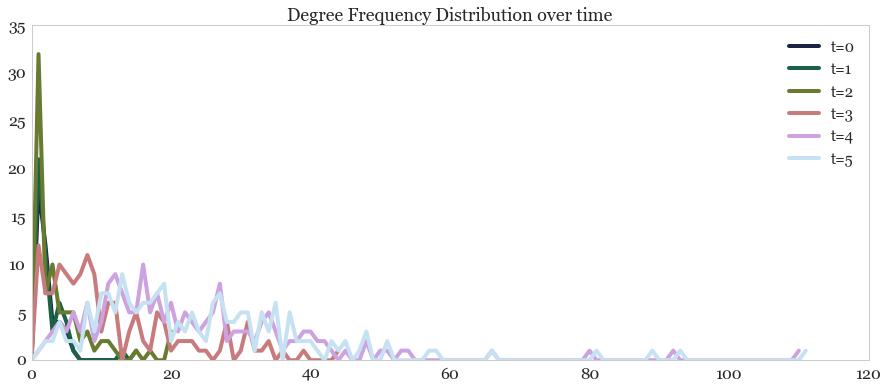

In [38]:
plt.title("Degree Frequency Distribution over time", fontsize=18)
plt.plot(nx.degree_histogram(Gt0), label='t=0')
plt.plot(nx.degree_histogram(Gt1), label='t=1')
plt.plot(nx.degree_histogram(Gt2), label='t=2')
plt.plot(nx.degree_histogram(Gt3), label='t=3')
plt.plot(nx.degree_histogram(Gt4), label='t=4')
plt.plot(nx.degree_histogram(Gt5), label='t=5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Users\arsha_000\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


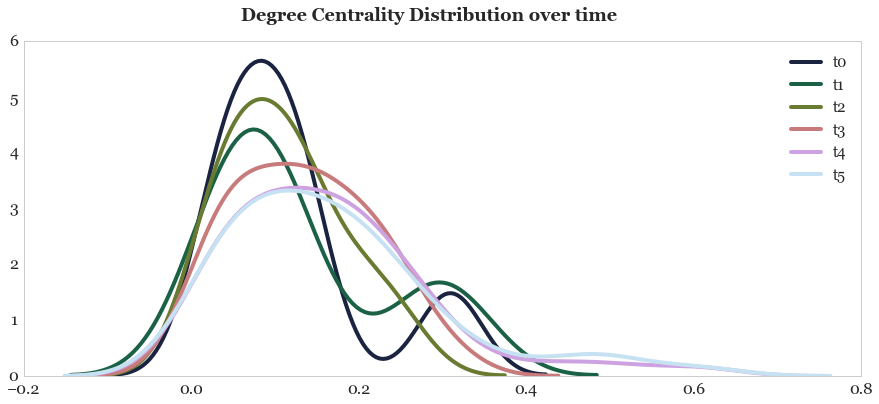

In [39]:
plt.suptitle('Degree Centrality Distribution over time', fontsize=18)
sns.distplot(get_val(degC0), hist=False, label='t0')
sns.distplot(get_val(degC1), hist=False, label='t1')
sns.distplot(get_val(degC2), hist=False, label='t2')
sns.distplot(get_val(degC3), hist=False, label='t3')
sns.distplot(get_val(degC4), hist=False, label='t4')
sns.distplot(get_val(degC5), hist=False, label='t5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Users\arsha_000\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


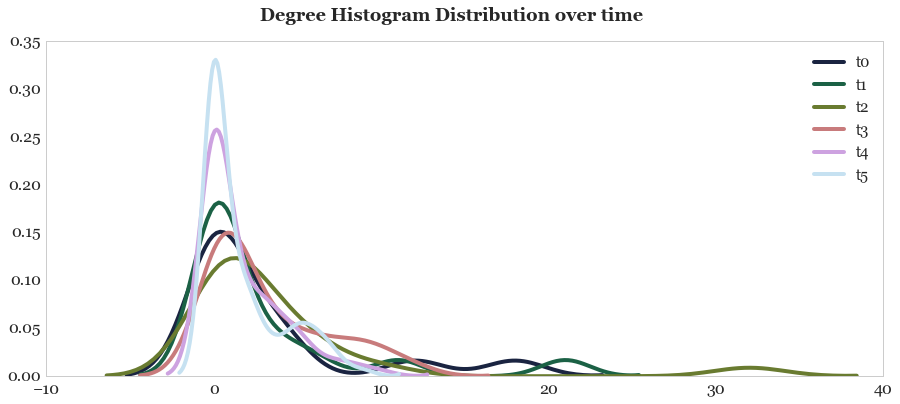

In [40]:
plt.suptitle('Degree Histogram Distribution over time', fontsize=18)
sns.distplot(nx.degree_histogram(Gt0), hist=False, label='t0')
sns.distplot(nx.degree_histogram(Gt1), hist=False, label='t1')
sns.distplot(nx.degree_histogram(Gt2), hist=False, label='t2')
sns.distplot(nx.degree_histogram(Gt3), hist=False, label='t3')
sns.distplot(nx.degree_histogram(Gt4), hist=False, label='t4')
sns.distplot(nx.degree_histogram(Gt5), hist=False, label='t5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

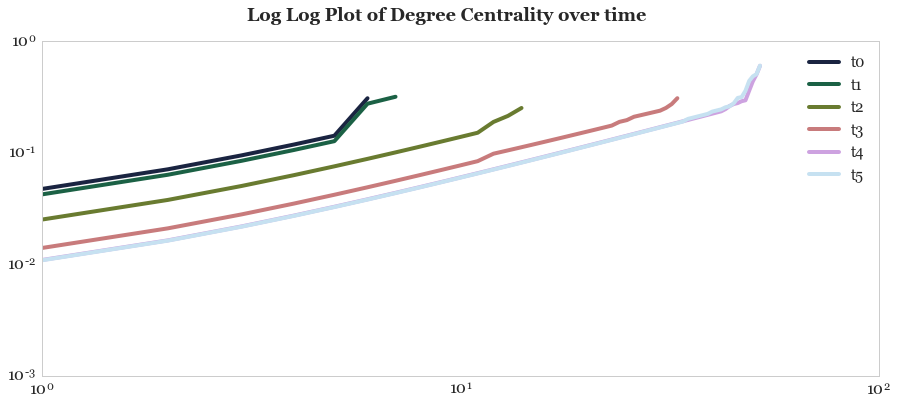

In [41]:
plt.suptitle('Log Log Plot of Degree Centrality over time', fontsize=18)

plt.loglog(get_val(degC0), label='t0')
plt.loglog(get_val(degC1), label='t1')
plt.loglog(get_val(degC2), label='t2') 
plt.loglog(get_val(degC3), label='t3')
plt.loglog(get_val(degC4), label='t4')
plt.loglog(get_val(degC5), label='t5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

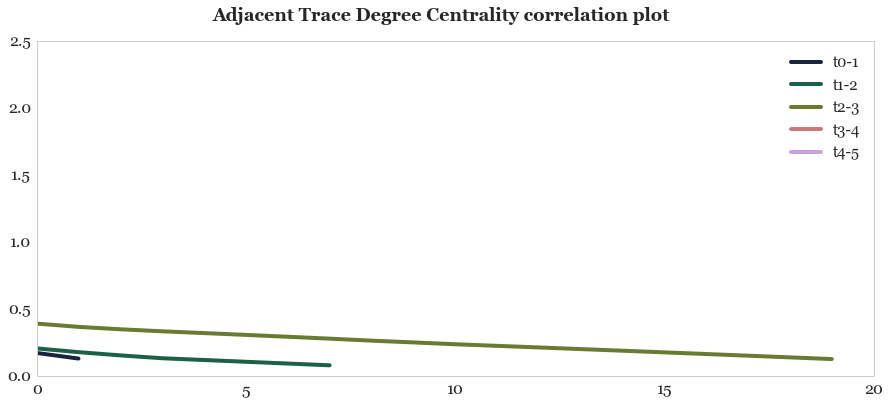

In [42]:
plt.suptitle('Adjacent Trace Degree Centrality correlation plot', fontsize=18)

plt.plot(np.correlate(get_val(degC0),get_val(degC1)),label='t0-1')
plt.plot(np.correlate(get_val(degC1),get_val(degC2)),label='t1-2')
plt.plot(np.correlate(get_val(degC2),get_val(degC3)),label='t2-3')
plt.plot(np.correlate(get_val(degC3),get_val(degC3)),label='t3-4') 
plt.plot(np.correlate(get_val(degC4),get_val(degC5)),label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

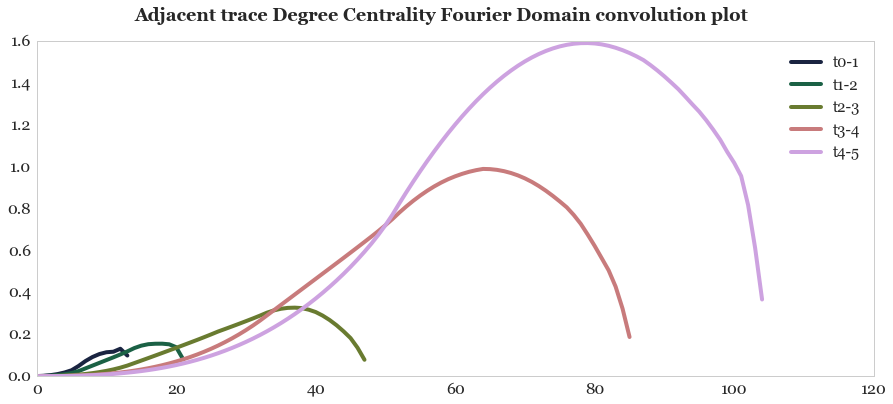

In [43]:
plt.suptitle('Adjacent trace Degree Centrality Fourier Domain convolution plot', fontsize=18)

plt.plot(fftconvolve(get_val(degC0),get_val(degC1)),label='t0-1')
plt.plot(fftconvolve(get_val(degC1),get_val(degC2)),  label='t1-2')
plt.plot(fftconvolve(get_val(degC2),get_val(degC3)), label='t2-3')
plt.plot(fftconvolve(get_val(degC3),get_val(degC4)), label='t3-4')
plt.plot(fftconvolve(get_val(degC4),get_val(degC5)),  label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Users\arsha_000\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


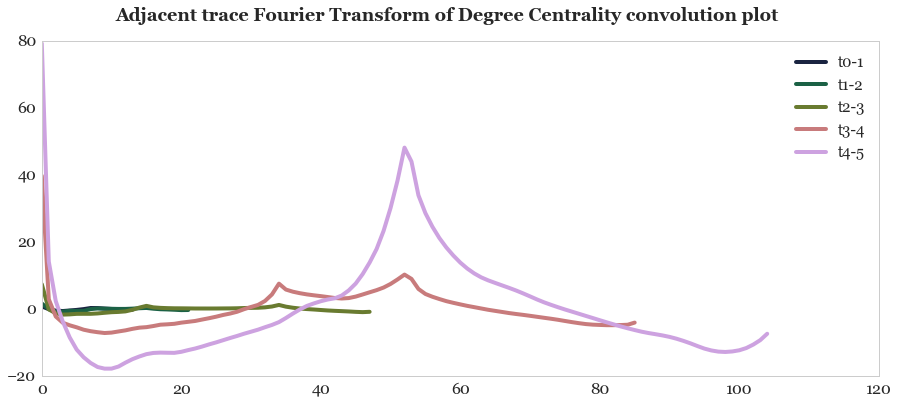

In [44]:
plt.suptitle('Adjacent trace Fourier Transform of Degree Centrality convolution plot', fontsize=18)

plt.plot(np.convolve(fft_sig(degC0),fft_sig(degC1)),label='t0-1')
plt.plot(np.convolve(fft_sig(degC1),fft_sig(degC2)),  label='t1-2')
plt.plot(np.convolve(fft_sig(degC2),fft_sig(degC3)), label='t2-3')
plt.plot(np.convolve(fft_sig(degC3),fft_sig(degC4)), label='t3-4')
plt.plot(np.convolve(fft_sig(degC4),fft_sig(degC5)),  label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Users\arsha_000\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


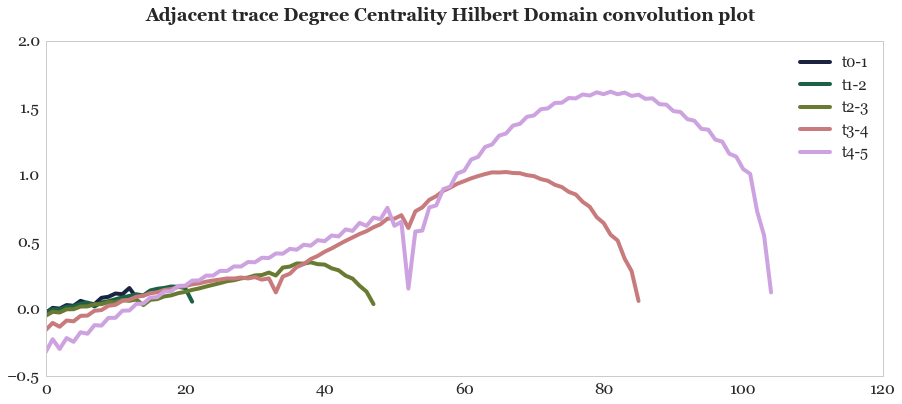

In [45]:
plt.suptitle('Adjacent trace Degree Centrality Hilbert Domain convolution plot', fontsize=18)

plt.plot(np.convolve(hilbert(get_val(degC0)), hilbert(get_val(degC1))),  label='t0-1')
plt.plot(np.convolve(hilbert(get_val(degC1)), hilbert(get_val(degC2))),  label='t1-2')
plt.plot(np.convolve(hilbert(get_val(degC2)), hilbert(get_val(degC3))), label='t2-3')
plt.plot(np.convolve(hilbert(get_val(degC3)), hilbert(get_val(degC4))), label='t3-4')
plt.plot(np.convolve(hilbert(get_val(degC4)), hilbert(get_val(degC5))),  label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

### Eigenvector Centrality Histograms

**Plotting the Eigenvector Centrality for the different timesteps here. For the first plot it is difficult to discern the trends when all the 6 distributions are plotted together. So in the next series of plots I look at a few a time and its easier to see the change over time. The signal essentially becomes more spiked and squashed over time. **

C:\Users\arsha_000\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


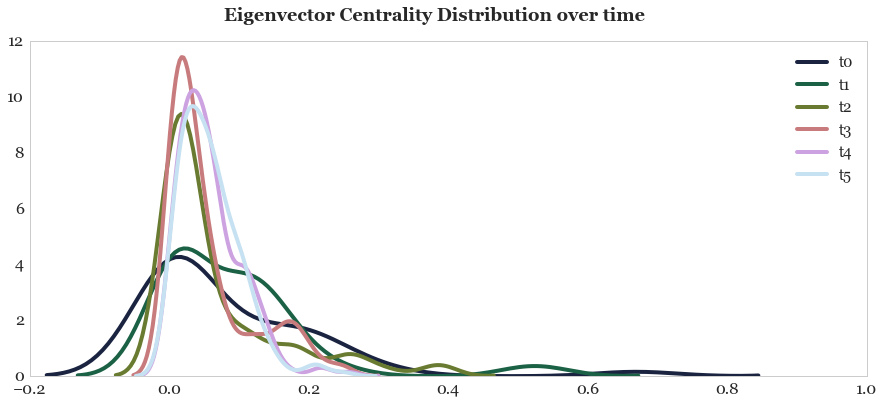

In [46]:
plt.suptitle('Eigenvector Centrality Distribution over time', fontsize=18)
sns.distplot(get_val(eigC0), hist=False, label='t0')
sns.distplot(get_val(eigC1), hist=False, label='t1')
sns.distplot(get_val(eigC2), hist=False, label='t2')
sns.distplot(get_val(eigC3), hist=False, label='t3')
sns.distplot(get_val(eigC4), hist=False, label='t4')
sns.distplot(get_val(eigC5), hist=False, label='t5')
             
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

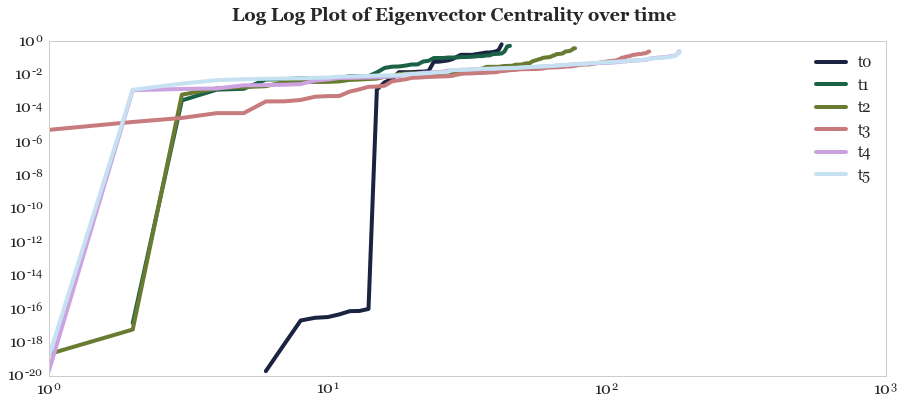

In [47]:
plt.suptitle('Log Log Plot of Eigenvector Centrality over time', fontsize=18)

plt.loglog(get_val(eigC0), label='t0')
plt.loglog(get_val(eigC1), label='t1')
plt.loglog(get_val(eigC2), label='t2') 
plt.loglog(get_val(eigC3), label='t3')
plt.loglog(get_val(eigC4), label='t4')
plt.loglog(get_val(eigC5), label='t5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

In [48]:
eigC0_a = np.asarray(get_val(eigC0))
eigC1_a = np.asarray(get_val(eigC1))

C:\Users\arsha_000\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


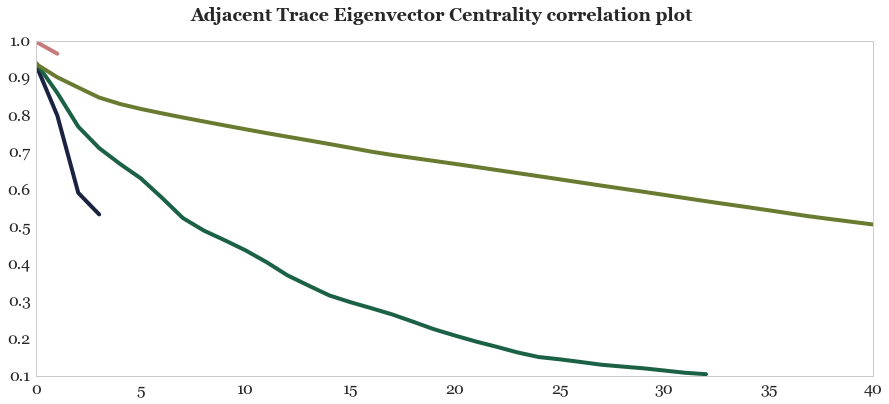

In [49]:
plt.suptitle('Adjacent Trace Eigenvector Centrality correlation plot', fontsize=18)

plt.plot(np.correlate(eigC0_a,eigC1_a))
plt.plot(np.correlate(get_val(eigC1),get_val(eigC2)))
plt.plot(np.correlate(get_val(eigC3),get_val(eigC4)))
plt.plot(np.correlate(get_val(eigC4),get_val(eigC5)))

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

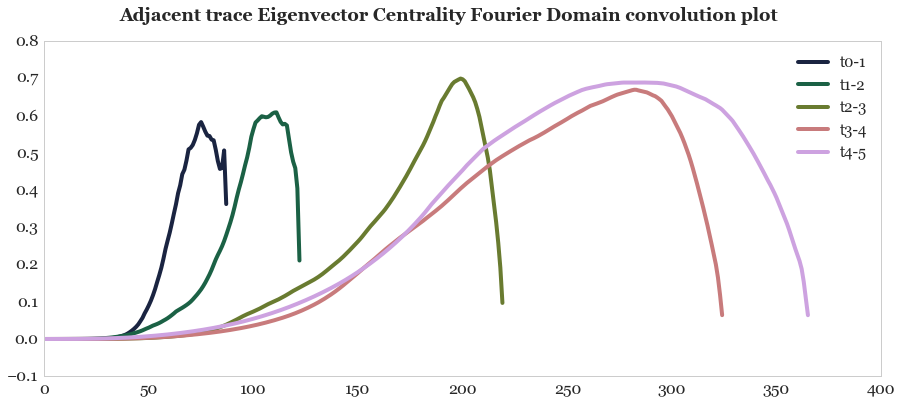

In [50]:
plt.suptitle('Adjacent trace Eigenvector Centrality Fourier Domain convolution plot', fontsize=18)

plt.plot(fftconvolve(get_val(eigC0),get_val(eigC1)),  label='t0-1')
plt.plot(fftconvolve(get_val(eigC1),get_val(eigC2)),  label='t1-2')
plt.plot(fftconvolve(get_val(eigC2),get_val(eigC3)), label='t2-3')
plt.plot(fftconvolve(get_val(eigC3),get_val(eigC4)), label='t3-4')
plt.plot(fftconvolve(get_val(eigC4),get_val(eigC5)),  label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Users\arsha_000\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


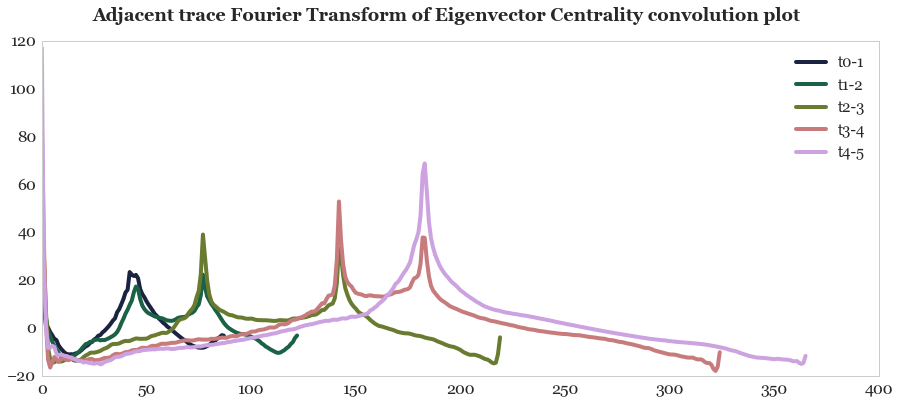

In [51]:
plt.suptitle('Adjacent trace Fourier Transform of Eigenvector Centrality convolution plot', fontsize=18)

plt.plot(np.convolve(fft_sig(eigC0),fft_sig(eigC1)),label='t0-1')
plt.plot(np.convolve(fft_sig(eigC1),fft_sig(eigC2)),  label='t1-2')
plt.plot(np.convolve(fft_sig(eigC2),fft_sig(eigC3)), label='t2-3')
plt.plot(np.convolve(fft_sig(eigC3),fft_sig(eigC4)), label='t3-4')
plt.plot(np.convolve(fft_sig(eigC4),fft_sig(eigC5)),  label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Users\arsha_000\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


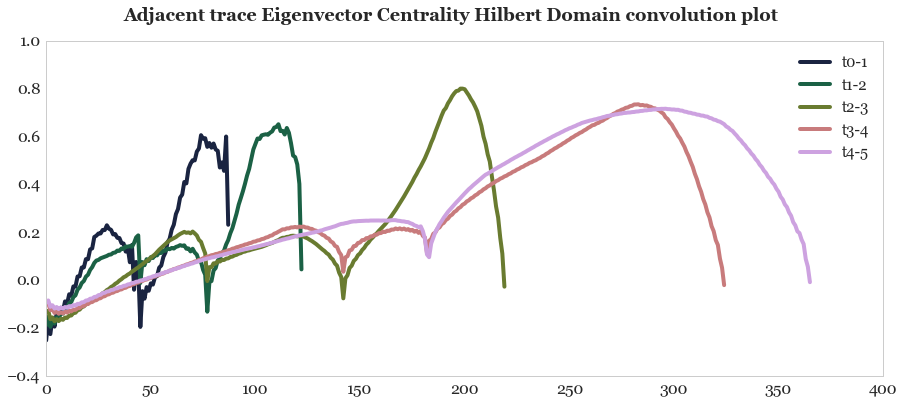

In [52]:
plt.suptitle('Adjacent trace Eigenvector Centrality Hilbert Domain convolution plot', fontsize=18)

plt.plot(np.convolve(hilbert(get_val(eigC0)), hilbert(get_val(eigC1))),  label='t0-1')
plt.plot(np.convolve(hilbert(get_val(eigC1)), hilbert(get_val(eigC2))),  label='t1-2')
plt.plot(np.convolve(hilbert(get_val(eigC2)), hilbert(get_val(eigC3))), label='t2-3')
plt.plot(np.convolve(hilbert(get_val(eigC3)), hilbert(get_val(eigC4))), label='t3-4')
plt.plot(np.convolve(hilbert(get_val(eigC4)), hilbert(get_val(eigC5))),  label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

In [53]:
print(np.correlate(eigC0_a,eigC1_a))
print(np.correlate(eigC0_a,eigC1_a)/np.sqrt(np.correlate(eigC0_a,eigC1_a)))

[ 0.934373    0.8003439   0.59281644  0.53482695]
[ 0.96662971  0.89461941  0.76994574  0.73131864]


### Closeness Centrality Histograms

**The Closeness Centrality shows a much better evolution over time than the Eigenvector Centrality Histograms**

C:\Users\arsha_000\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


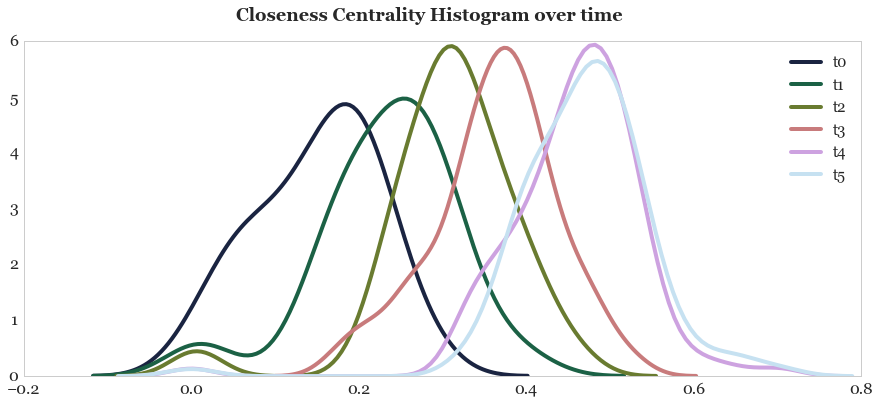

In [54]:
plt.suptitle('Closeness Centrality Histogram over time', fontsize=18)
sns.distplot(get_val(cloC0), hist=False, label='t0')
sns.distplot(get_val(cloC1), hist=False, label='t1')
sns.distplot(get_val(cloC2), hist=False, label='t2')
sns.distplot(get_val(cloC3), hist=False, label='t3')
sns.distplot(get_val(cloC4), hist=False, label='t4')
sns.distplot(get_val(cloC5), hist=False, label='t5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

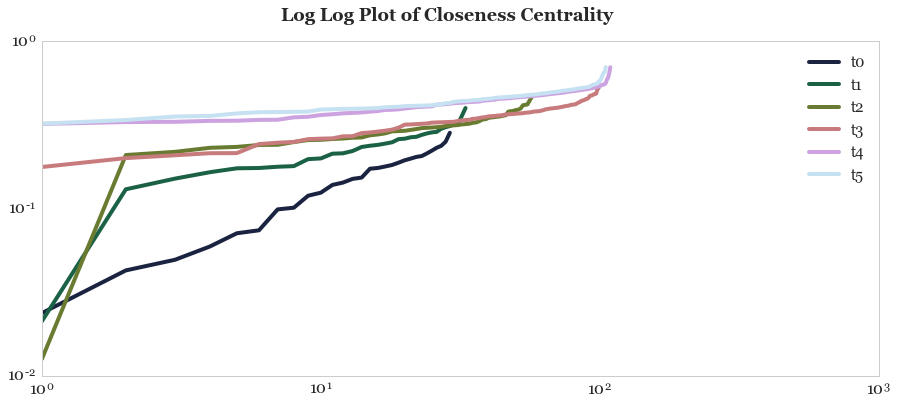

In [55]:
plt.suptitle('Log Log Plot of Closeness Centrality', fontsize=18)

plt.loglog(get_val(cloC0),label='t0')
plt.loglog(get_val(cloC1),label='t1')
plt.loglog(get_val(cloC2),label='t2')
plt.loglog(get_val(cloC3),label='t3')
plt.loglog(get_val(cloC4),label='t4')
plt.loglog(get_val(cloC5),label='t5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

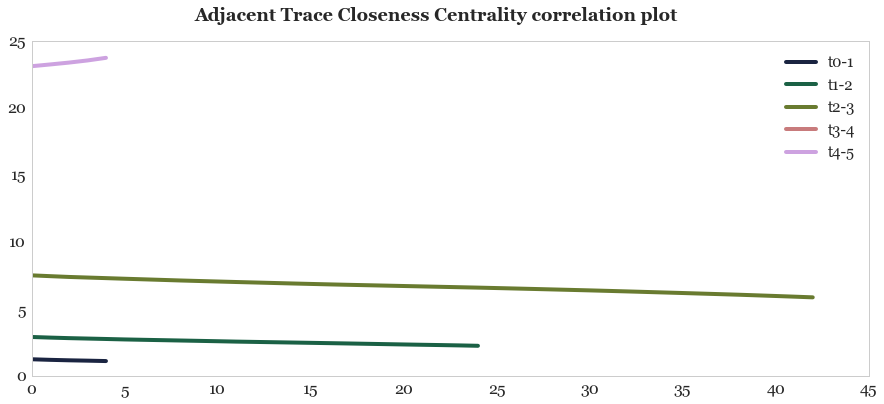

In [56]:
plt.suptitle('Adjacent Trace Closeness Centrality correlation plot', fontsize=18)

plt.plot(np.correlate(get_val(cloC0),get_val(cloC1)),label='t0-1')
plt.plot(np.correlate(get_val(cloC1),get_val(cloC2)),label='t1-2')
plt.plot(np.correlate(get_val(cloC2),get_val(cloC3)),label='t2-3')
plt.plot(np.correlate(get_val(cloC3),get_val(cloC3)),label='t3-4') 
plt.plot(np.correlate(get_val(cloC4),get_val(cloC5)),label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

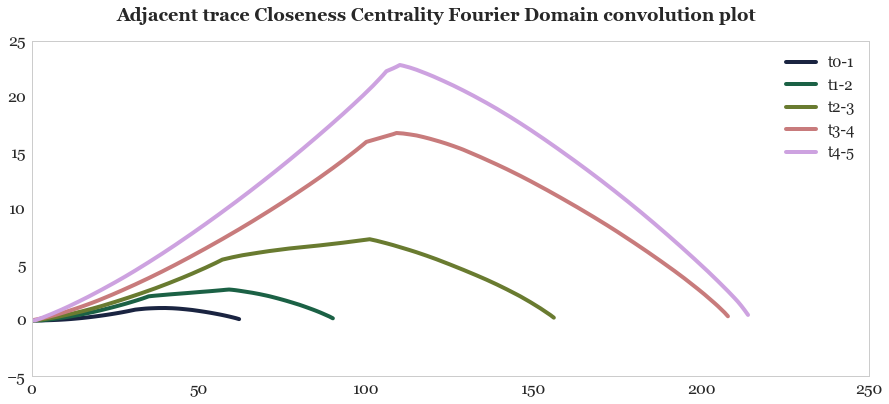

In [57]:
plt.suptitle('Adjacent trace Closeness Centrality Fourier Domain convolution plot', fontsize=18)

plt.plot(fftconvolve(get_val(cloC0),get_val(cloC1)),label='t0-1')
plt.plot(fftconvolve(get_val(cloC1),get_val(cloC2)),  label='t1-2')
plt.plot(fftconvolve(get_val(cloC2),get_val(cloC3)), label='t2-3')
plt.plot(fftconvolve(get_val(cloC3),get_val(cloC4)), label='t3-4')
plt.plot(fftconvolve(get_val(cloC4),get_val(cloC5)),  label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Users\arsha_000\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


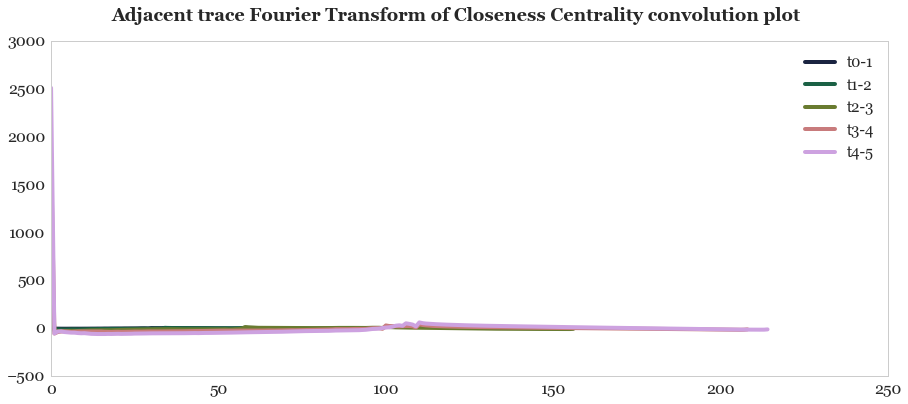

In [58]:
plt.suptitle('Adjacent trace Fourier Transform of Closeness Centrality convolution plot', fontsize=18)

plt.plot(np.convolve(fft_sig(cloC0),fft_sig(cloC1)),label='t0-1')
plt.plot(np.convolve(fft_sig(cloC1),fft_sig(cloC2)),label='t1-2')
plt.plot(np.convolve(fft_sig(cloC2),fft_sig(cloC3)),label='t2-3')
plt.plot(np.convolve(fft_sig(cloC3),fft_sig(cloC4)),label='t3-4')
plt.plot(np.convolve(fft_sig(cloC4),fft_sig(cloC5)),label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Users\arsha_000\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


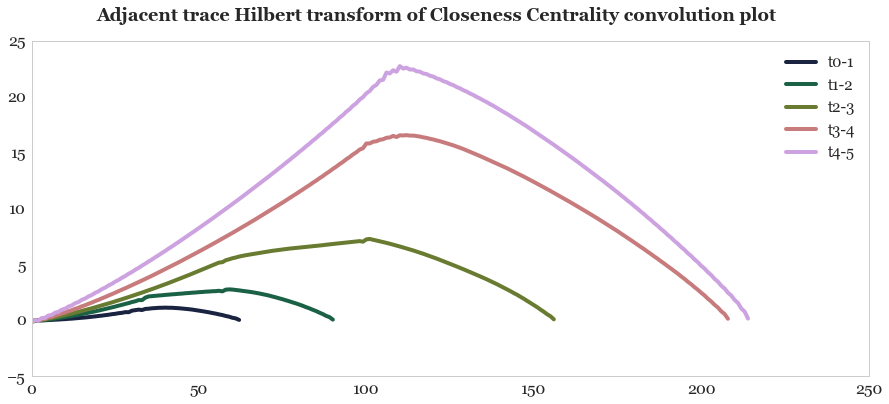

In [59]:
plt.suptitle('Adjacent trace Hilbert transform of Closeness Centrality convolution plot', fontsize=18)

plt.plot(np.convolve(hilbert_sig(cloC0), hilbert_sig(cloC1)), label='t0-1')
plt.plot(np.convolve(hilbert_sig(cloC1), hilbert_sig(cloC2)), label='t1-2')
plt.plot(np.convolve(hilbert_sig(cloC2), hilbert_sig(cloC3)),label='t2-3')
plt.plot(np.convolve(hilbert_sig(cloC3), hilbert_sig(cloC4)), label='t3-4')
plt.plot(np.convolve(hilbert_sig(cloC4), hilbert_sig(cloC5)), label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

### Betweenness Centrality Histogram

C:\Users\arsha_000\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


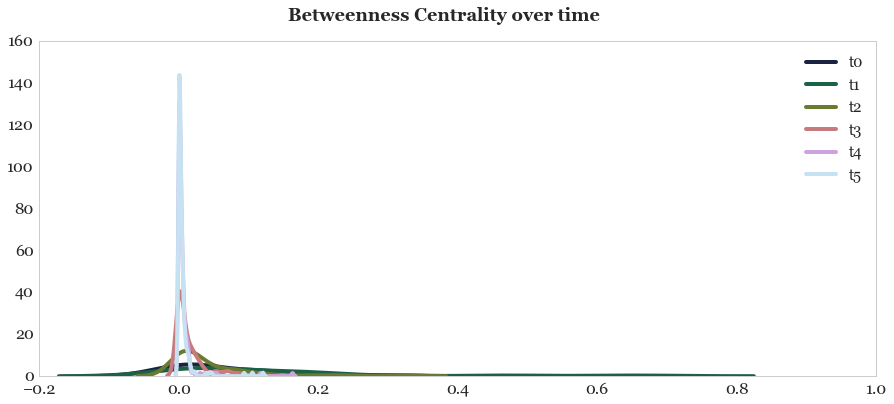

In [60]:
plt.suptitle('Betweenness Centrality over time', fontsize=18)
sns.distplot(get_val(betC0), hist=False, label='t0')
sns.distplot(get_val(betC1), hist=False, label='t1')
sns.distplot(get_val(betC2), hist=False, label='t2')
sns.distplot(get_val(betC3), hist=False, label='t3')
sns.distplot(get_val(betC4), hist=False, label='t4')
sns.distplot(get_val(betC5), hist=False, label='t5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

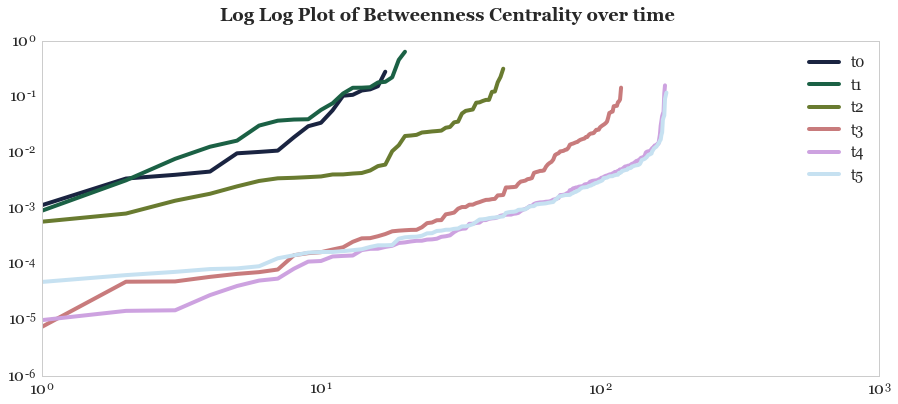

In [61]:
plt.suptitle('Log Log Plot of Betweenness Centrality over time', fontsize=18)

plt.loglog(get_val(betC0), label='t0')
plt.loglog(get_val(betC1), label='t1')
plt.loglog(get_val(betC2), label='t2') 
plt.loglog(get_val(betC3), label='t3')
plt.loglog(get_val(betC4), label='t4')
plt.loglog(get_val(betC5), label='t5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

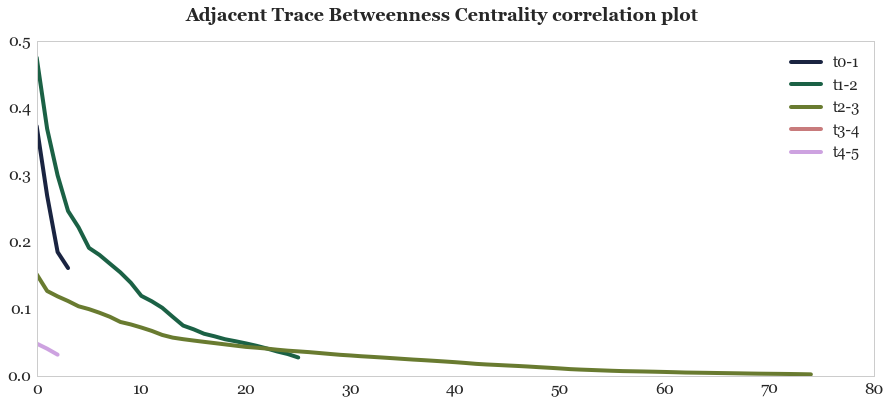

In [62]:
plt.suptitle('Adjacent Trace Betweenness Centrality correlation plot', fontsize=18)

plt.plot(np.correlate(get_val(betC0),get_val(betC1)),label='t0-1')
plt.plot(np.correlate(get_val(betC1),get_val(betC2)),label='t1-2')
plt.plot(np.correlate(get_val(betC2),get_val(betC3)),label='t2-3')
plt.plot(np.correlate(get_val(betC3),get_val(betC3)),label='t3-4') 
plt.plot(np.correlate(get_val(betC4),get_val(betC5)),label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

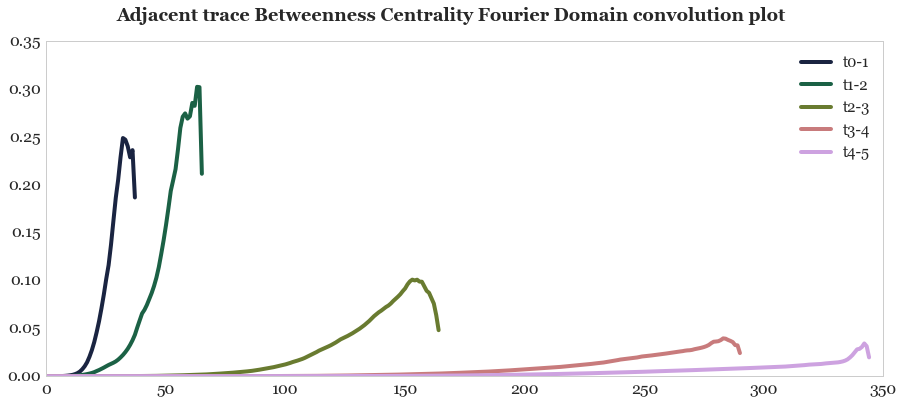

In [63]:
plt.suptitle('Adjacent trace Betweenness Centrality Fourier Domain convolution plot', fontsize=18)

plt.plot(fftconvolve(get_val(betC0),get_val(betC1)),label='t0-1')
plt.plot(fftconvolve(get_val(betC1),get_val(betC2)),  label='t1-2')
plt.plot(fftconvolve(get_val(betC2),get_val(betC3)), label='t2-3')
plt.plot(fftconvolve(get_val(betC3),get_val(betC4)), label='t3-4')
plt.plot(fftconvolve(get_val(betC4),get_val(betC5)),  label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Users\arsha_000\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


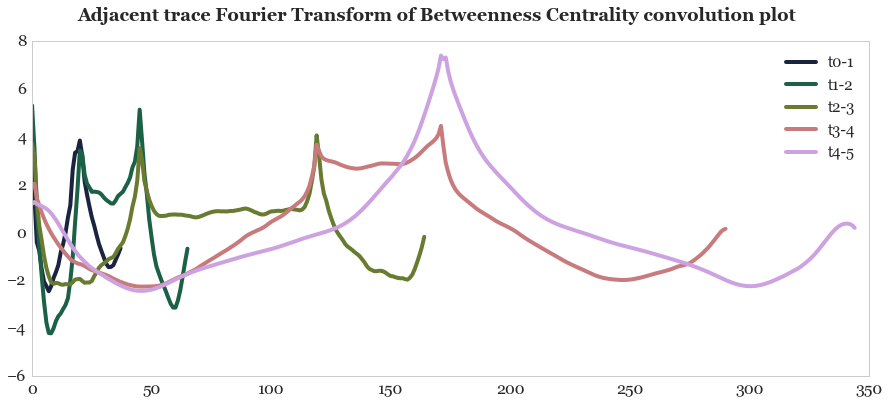

In [64]:
plt.suptitle('Adjacent trace Fourier Transform of Betweenness Centrality convolution plot', fontsize=18)

plt.plot(np.convolve(fft_sig(betC0),fft_sig(betC1)),label='t0-1')
plt.plot(np.convolve(fft_sig(betC1),fft_sig(betC2)),label='t1-2')
plt.plot(np.convolve(fft_sig(betC2),fft_sig(betC3)),label='t2-3')
plt.plot(np.convolve(fft_sig(betC3),fft_sig(betC4)),label='t3-4')
plt.plot(np.convolve(fft_sig(betC4),fft_sig(betC5)),label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Users\arsha_000\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


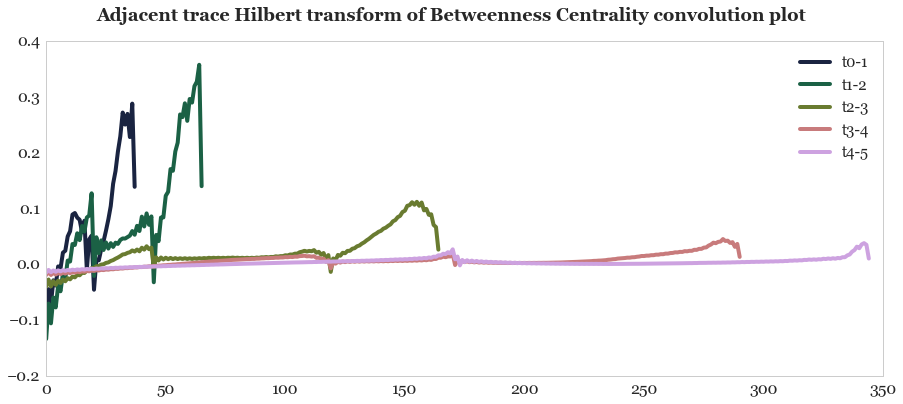

In [65]:
plt.suptitle('Adjacent trace Hilbert transform of Betweenness Centrality convolution plot', fontsize=18)

plt.plot(np.convolve(hilbert_sig(betC0), hilbert_sig(betC1)), label='t0-1')
plt.plot(np.convolve(hilbert_sig(betC1), hilbert_sig(betC2)), label='t1-2')
plt.plot(np.convolve(hilbert_sig(betC2), hilbert_sig(betC3)),label='t2-3')
plt.plot(np.convolve(hilbert_sig(betC3), hilbert_sig(betC4)), label='t3-4')
plt.plot(np.convolve(hilbert_sig(betC4), hilbert_sig(betC5)), label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

### Communicability Centrality Histograms

C:\Users\arsha_000\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


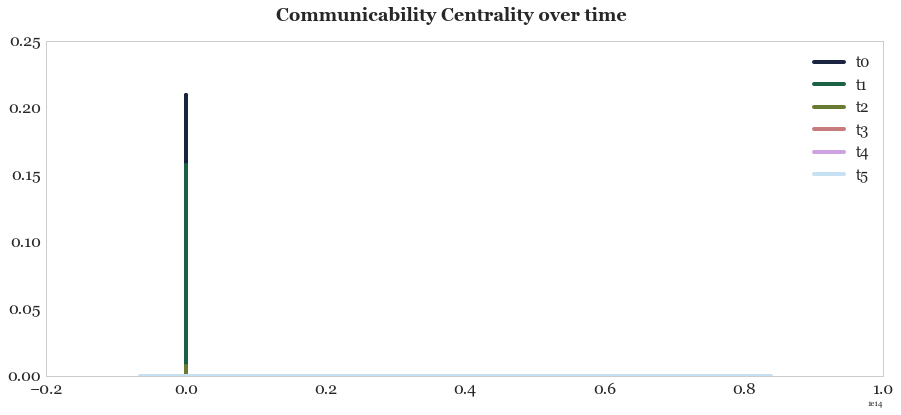

In [66]:
plt.suptitle('Communicability Centrality over time', fontsize=18)
sns.distplot(get_val(commuC0), hist=False, label='t0')
sns.distplot(get_val(commuC1), hist=False, label='t1')
sns.distplot(get_val(commuC2), hist=False, label='t2')
sns.distplot(get_val(commuC3), hist=False, label='t3')
sns.distplot(get_val(commuC4), hist=False, label='t4')
sns.distplot(get_val(commuC5), hist=False, label='t5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

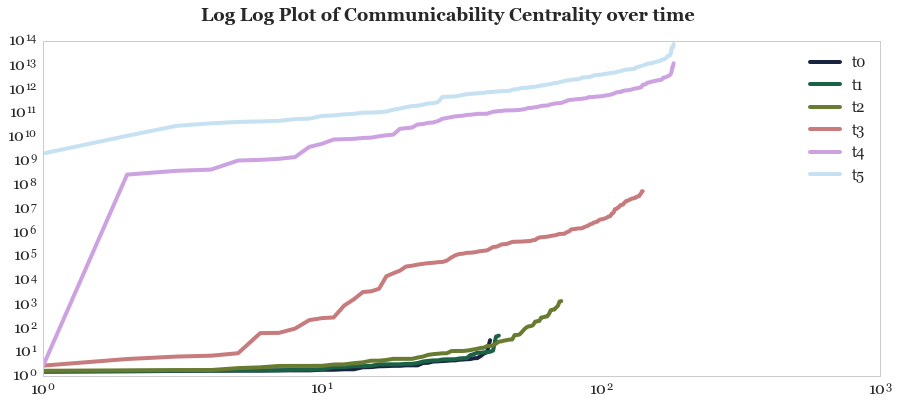

In [67]:
plt.suptitle('Log Log Plot of Communicability Centrality over time', fontsize=18)

plt.loglog(get_val(commuC0), label='t0')
plt.loglog(get_val(commuC1), label='t1')
plt.loglog(get_val(commuC2), label='t2') 
plt.loglog(get_val(commuC3), label='t3')
plt.loglog(get_val(commuC4), label='t4')
plt.loglog(get_val(commuC5), label='t5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

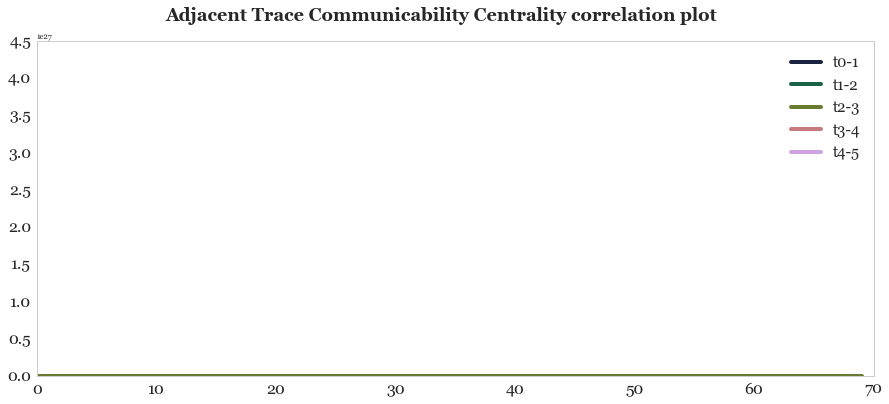

In [68]:
plt.suptitle('Adjacent Trace Communicability Centrality correlation plot', fontsize=18)

plt.plot(np.correlate(get_val(commuC0),get_val(commuC1)),label='t0-1')
plt.plot(np.correlate(get_val(commuC1),get_val(commuC2)),label='t1-2')
plt.plot(np.correlate(get_val(commuC2),get_val(commuC3)),label='t2-3')
plt.plot(np.correlate(get_val(commuC3),get_val(commuC3)),label='t3-4') 
plt.plot(np.correlate(get_val(commuC4),get_val(commuC5)),label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

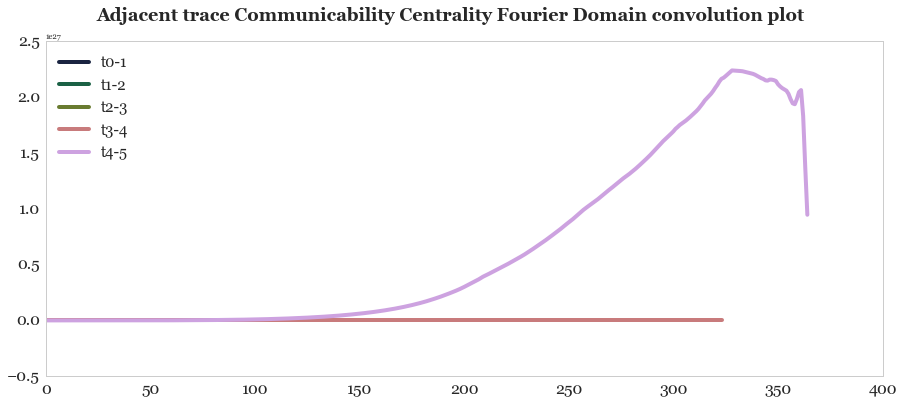

In [69]:
plt.suptitle('Adjacent trace Communicability Centrality Fourier Domain convolution plot', fontsize=18)

plt.plot(fftconvolve(get_val(commuC0),get_val(commuC1)),label='t0-1')
plt.plot(fftconvolve(get_val(commuC1),get_val(commuC2)),  label='t1-2')
plt.plot(fftconvolve(get_val(commuC2),get_val(commuC3)), label='t2-3')
plt.plot(fftconvolve(get_val(commuC3),get_val(commuC4)), label='t3-4')
plt.plot(fftconvolve(get_val(commuC4),get_val(commuC5)),  label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=2, fontsize=15)

C:\Users\arsha_000\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


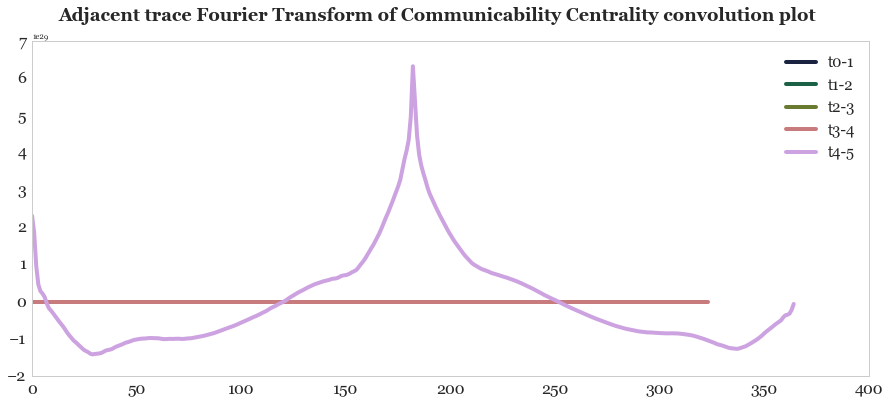

In [70]:
plt.suptitle('Adjacent trace Fourier Transform of Communicability Centrality convolution plot', fontsize=18)

plt.plot(np.convolve(fft_sig(commuC0),fft_sig(commuC1)),label='t0-1')
plt.plot(np.convolve(fft_sig(commuC1),fft_sig(commuC2)),label='t1-2')
plt.plot(np.convolve(fft_sig(commuC2),fft_sig(commuC3)),label='t2-3')
plt.plot(np.convolve(fft_sig(commuC3),fft_sig(commuC4)),label='t3-4')
plt.plot(np.convolve(fft_sig(commuC4),fft_sig(commuC5)),label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Users\arsha_000\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


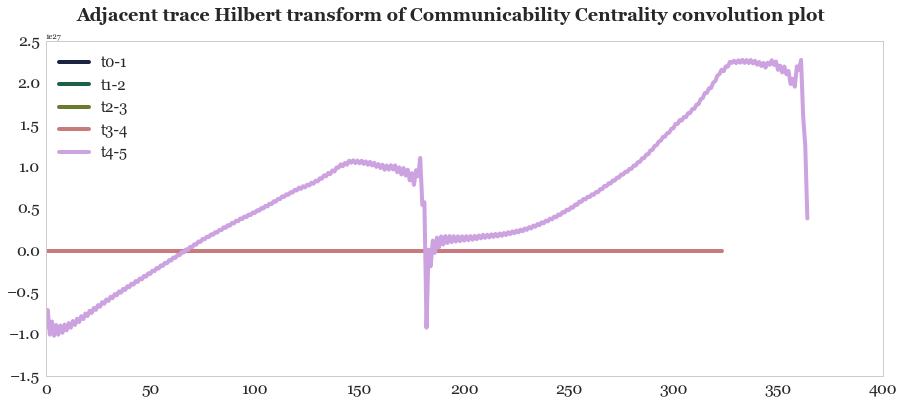

In [71]:
plt.suptitle('Adjacent trace Hilbert transform of Communicability Centrality convolution plot', fontsize=18)

plt.plot(np.convolve(hilbert_sig(commuC0), hilbert_sig(commuC1)), label='t0-1')
plt.plot(np.convolve(hilbert_sig(commuC1), hilbert_sig(commuC2)), label='t1-2')
plt.plot(np.convolve(hilbert_sig(commuC2), hilbert_sig(commuC3)),label='t2-3')
plt.plot(np.convolve(hilbert_sig(commuC3), hilbert_sig(commuC4)), label='t3-4')
plt.plot(np.convolve(hilbert_sig(commuC4), hilbert_sig(commuC5)), label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=2, fontsize=15)

### Katz Centrality Histograms

C:\Users\arsha_000\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


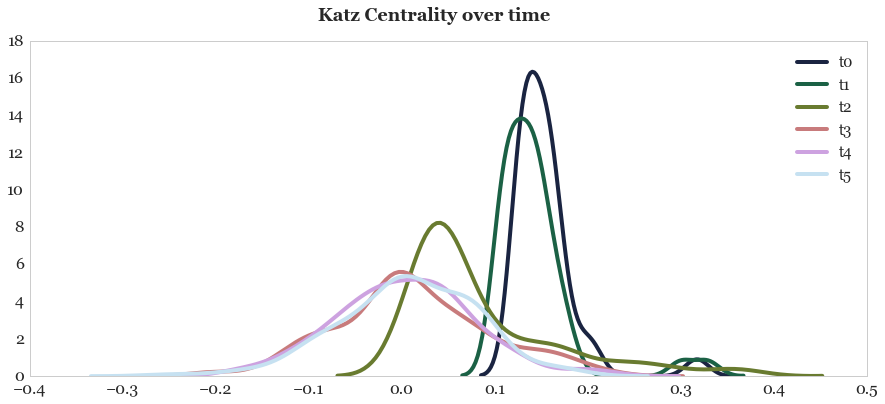

In [72]:
plt.suptitle('Katz Centrality over time', fontsize=18)
sns.distplot(get_val(katzC0), hist=False, label='t0')
sns.distplot(get_val(katzC1), hist=False, label='t1')
sns.distplot(get_val(katzC2), hist=False, label='t2')
sns.distplot(get_val(katzC3), hist=False, label='t3')
sns.distplot(get_val(katzC4), hist=False, label='t4')
sns.distplot(get_val(katzC5), hist=False, label='t5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

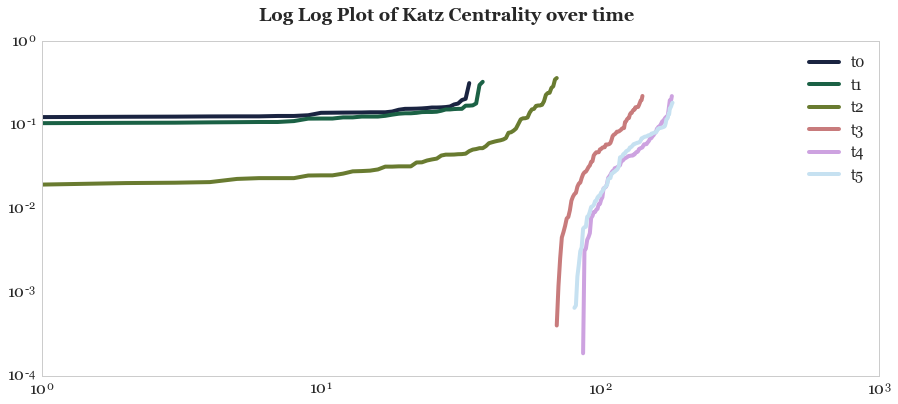

In [73]:
plt.suptitle('Log Log Plot of Katz Centrality over time', fontsize=18)

plt.loglog(get_val(katzC0), label='t0')
plt.loglog(get_val(katzC1), label='t1')
plt.loglog(get_val(katzC2), label='t2') 
plt.loglog(get_val(katzC3), label='t3')
plt.loglog(get_val(katzC4), label='t4')
plt.loglog(get_val(katzC5), label='t5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

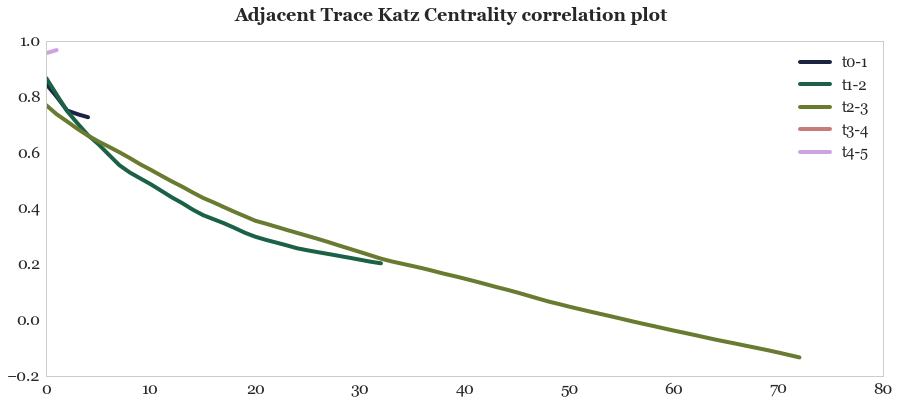

In [74]:
plt.suptitle('Adjacent Trace Katz Centrality correlation plot', fontsize=18)

plt.plot(np.correlate(get_val(katzC0),get_val(katzC1)),label='t0-1')
plt.plot(np.correlate(get_val(katzC1),get_val(katzC2)),label='t1-2')
plt.plot(np.correlate(get_val(katzC2),get_val(katzC3)),label='t2-3')
plt.plot(np.correlate(get_val(katzC3),get_val(katzC3)),label='t3-4') 
plt.plot(np.correlate(get_val(katzC4),get_val(katzC5)),label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

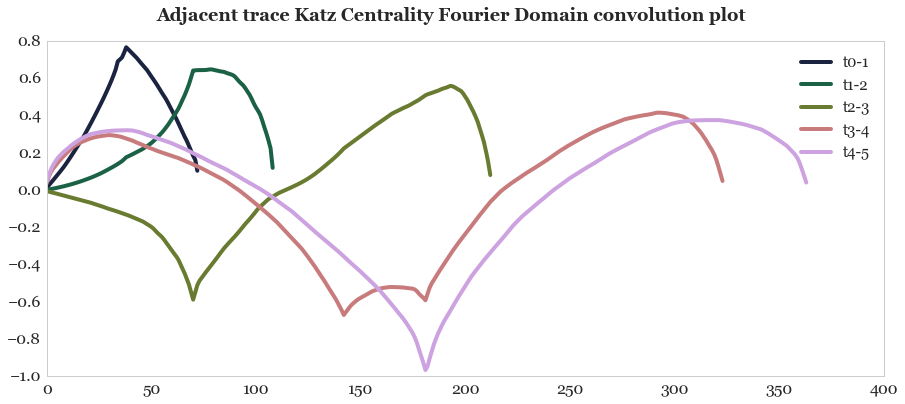

In [75]:
plt.suptitle('Adjacent trace Katz Centrality Fourier Domain convolution plot', fontsize=18)

plt.plot(fftconvolve(get_val(katzC0),get_val(katzC1)),label='t0-1')
plt.plot(fftconvolve(get_val(katzC1),get_val(katzC2)),  label='t1-2')
plt.plot(fftconvolve(get_val(katzC2),get_val(katzC3)), label='t2-3')
plt.plot(fftconvolve(get_val(katzC3),get_val(katzC4)), label='t3-4')
plt.plot(fftconvolve(get_val(katzC4),get_val(katzC5)),  label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Users\arsha_000\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


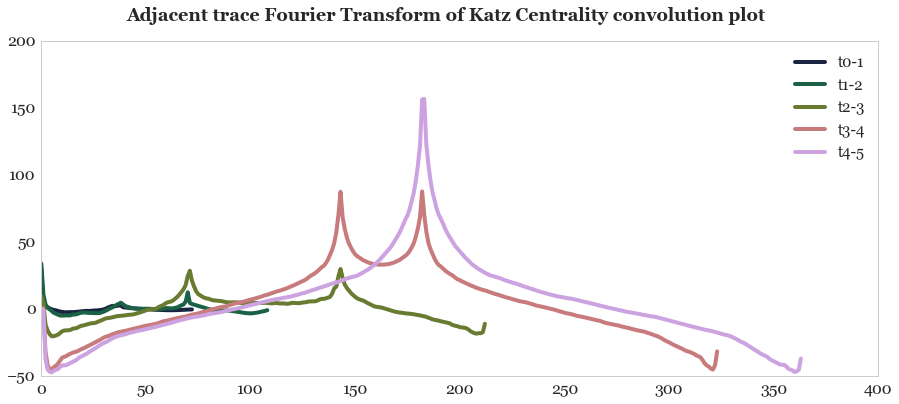

In [76]:
plt.suptitle('Adjacent trace Fourier Transform of Katz Centrality convolution plot', fontsize=18)

plt.plot(np.convolve(fft_sig(katzC0),fft_sig(katzC1)),label='t0-1')
plt.plot(np.convolve(fft_sig(katzC1),fft_sig(katzC2)),label='t1-2')
plt.plot(np.convolve(fft_sig(katzC2),fft_sig(katzC3)),label='t2-3')
plt.plot(np.convolve(fft_sig(katzC3),fft_sig(katzC4)),label='t3-4')
plt.plot(np.convolve(fft_sig(katzC4),fft_sig(katzC5)),label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Users\arsha_000\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


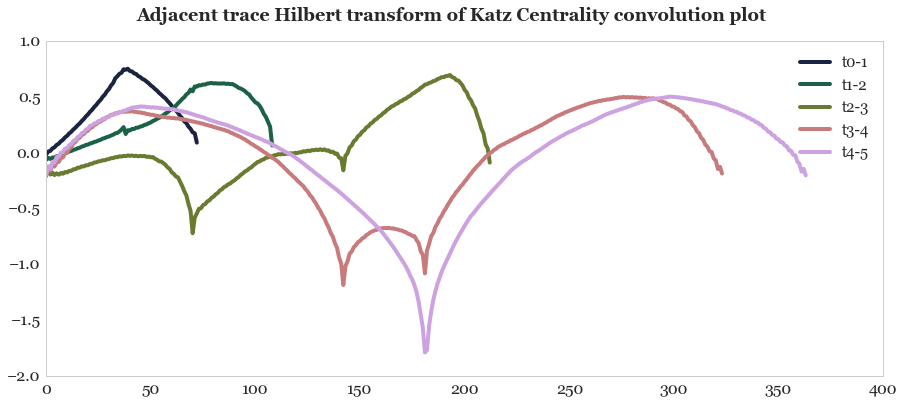

In [77]:
plt.suptitle('Adjacent trace Hilbert transform of Katz Centrality convolution plot', fontsize=18)

plt.plot(np.convolve(hilbert_sig(katzC0), hilbert_sig(katzC1)), label='t0-1')
plt.plot(np.convolve(hilbert_sig(katzC1), hilbert_sig(katzC2)), label='t1-2')
plt.plot(np.convolve(hilbert_sig(katzC2), hilbert_sig(katzC3)),label='t2-3')
plt.plot(np.convolve(hilbert_sig(katzC3), hilbert_sig(katzC4)), label='t3-4')
plt.plot(np.convolve(hilbert_sig(katzC4), hilbert_sig(katzC5)), label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

### Load Centrality

C:\Users\arsha_000\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


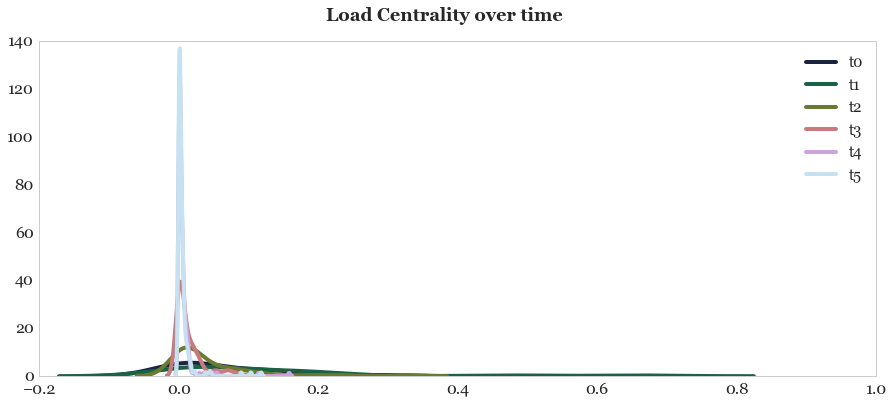

In [78]:
plt.suptitle('Load Centrality over time', fontsize=18)

sns.distplot(get_val(loadC0), hist=False, label='t0')
sns.distplot(get_val(loadC1), hist=False, label='t1')
sns.distplot(get_val(loadC2), hist=False, label='t2')
sns.distplot(get_val(loadC3), hist=False, label='t3')
sns.distplot(get_val(loadC4), hist=False, label='t4')
sns.distplot(get_val(loadC5), hist=False, label='t5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

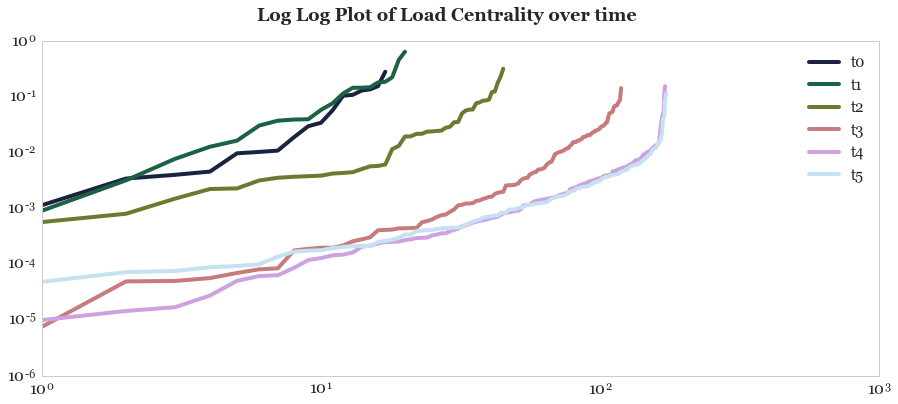

In [79]:
plt.suptitle('Log Log Plot of Load Centrality over time', fontsize=18)

plt.loglog(get_val(loadC0), label='t0')
plt.loglog(get_val(loadC1), label='t1')
plt.loglog(get_val(loadC2), label='t2') 
plt.loglog(get_val(loadC3), label='t3')
plt.loglog(get_val(loadC4), label='t4')
plt.loglog(get_val(loadC5), label='t5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

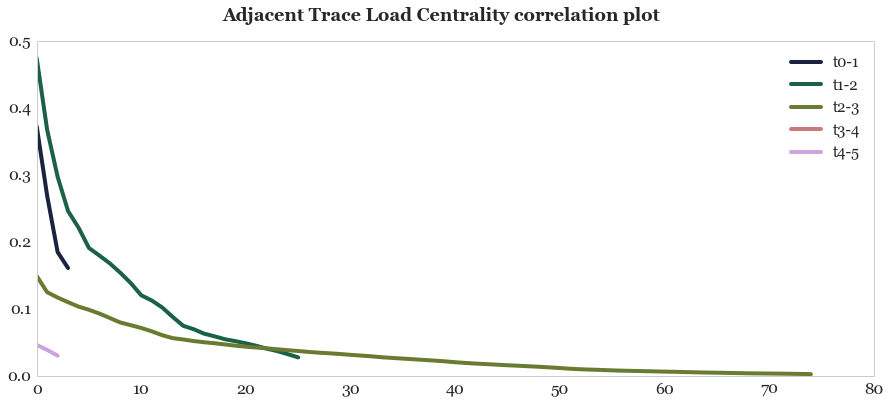

In [80]:
plt.suptitle('Adjacent Trace Load Centrality correlation plot', fontsize=18)

plt.plot(np.correlate(get_val(loadC0),get_val(loadC1)),label='t0-1')
plt.plot(np.correlate(get_val(loadC1),get_val(loadC2)),label='t1-2')
plt.plot(np.correlate(get_val(loadC2),get_val(loadC3)),label='t2-3')
plt.plot(np.correlate(get_val(loadC3),get_val(loadC3)),label='t3-4') 
plt.plot(np.correlate(get_val(loadC4),get_val(loadC5)),label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

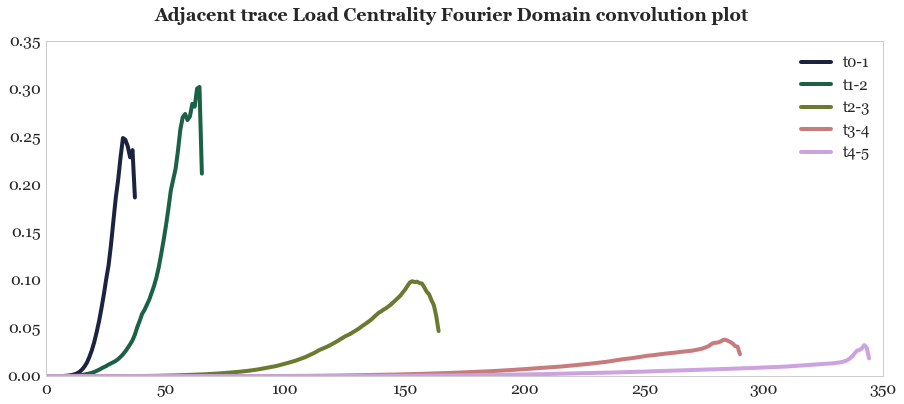

In [81]:
plt.suptitle('Adjacent trace Load Centrality Fourier Domain convolution plot', fontsize=18)

plt.plot(fftconvolve(get_val(loadC0),get_val(loadC1)),label='t0-1')
plt.plot(fftconvolve(get_val(loadC1),get_val(loadC2)),  label='t1-2')
plt.plot(fftconvolve(get_val(loadC2),get_val(loadC3)), label='t2-3')
plt.plot(fftconvolve(get_val(loadC3),get_val(loadC4)), label='t3-4')
plt.plot(fftconvolve(get_val(loadC4),get_val(loadC5)),  label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Users\arsha_000\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


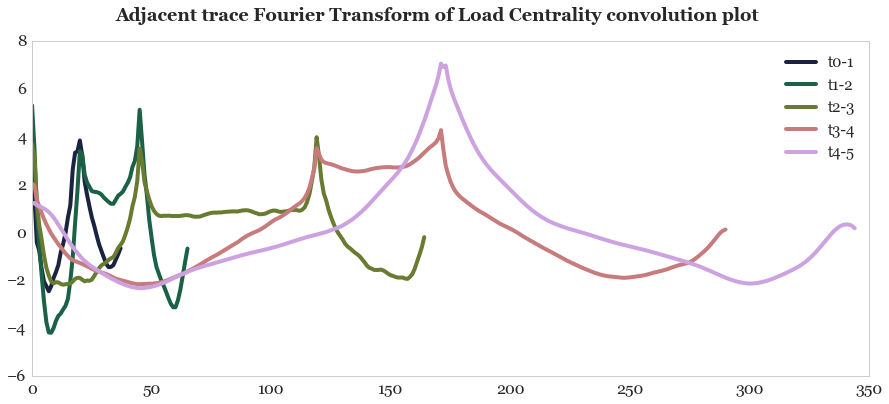

In [82]:
plt.suptitle('Adjacent trace Fourier Transform of Load Centrality convolution plot', fontsize=18)

plt.plot(np.convolve(fft_sig(loadC0),fft_sig(loadC1)),label='t0-1')
plt.plot(np.convolve(fft_sig(loadC1),fft_sig(loadC2)),label='t1-2')
plt.plot(np.convolve(fft_sig(loadC2),fft_sig(loadC3)),label='t2-3')
plt.plot(np.convolve(fft_sig(loadC3),fft_sig(loadC4)),label='t3-4')
plt.plot(np.convolve(fft_sig(loadC4),fft_sig(loadC5)),label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Users\arsha_000\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


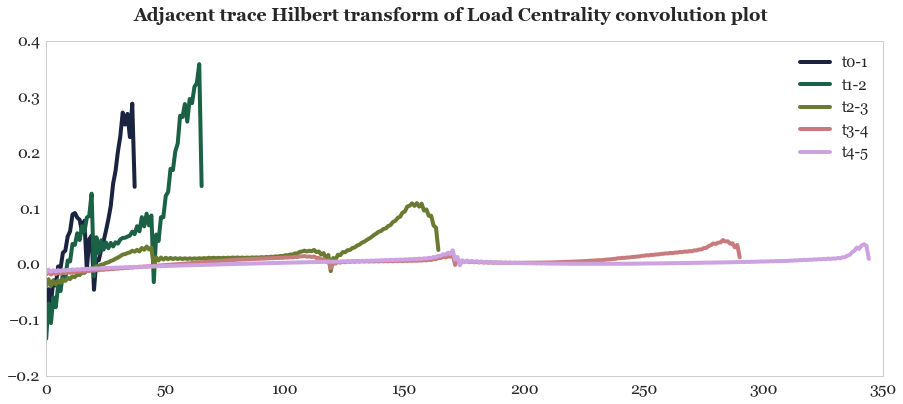

In [83]:
plt.suptitle('Adjacent trace Hilbert transform of Load Centrality convolution plot', fontsize=18)

plt.plot(np.convolve(hilbert_sig(loadC0), hilbert_sig(loadC1)), label='t0-1')
plt.plot(np.convolve(hilbert_sig(loadC1), hilbert_sig(loadC2)), label='t1-2')
plt.plot(np.convolve(hilbert_sig(loadC2), hilbert_sig(loadC3)),label='t2-3')
plt.plot(np.convolve(hilbert_sig(loadC3), hilbert_sig(loadC4)), label='t3-4')
plt.plot(np.convolve(hilbert_sig(loadC4), hilbert_sig(loadC5)), label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

## Centrality Analysis with averaging

### Calculate Centrality Statistics at different time steps

In [84]:
deg0, clo0, bet0, eig0, alg0, clust0, commC0, katz0,load0 = cal_stat(Gt0)
deg1, clo1, bet1, eig1, alg1, clust1, commC1, katz1,load1 = cal_stat(Gt1)
deg2, clo2, bet2, eig2, alg2, clust2, commC2, katz2, load2 = cal_stat(Gt2)
deg3, clo3, bet3, eig3, alg3, clust3, commC3, katz3,load3 = cal_stat(Gt3)
deg4, clo4, bet4, eig4, alg4, clust4, commC4, katz4,load4 = cal_stat(Gt4)
deg5, clo5, bet5, eig5, alg5, clust5, commC5, katz5, load5 = cal_stat(Gt5)

In [85]:
stat_df = pd.DataFrame([deg0,deg1,deg2,deg3,deg4,deg5])

In [86]:
#calculate density
den0 = nx.density(Gt0)
den1 = nx.density(Gt1)
den2 = nx.density(Gt2)
den3 = nx.density(Gt3)
den4 = nx.density(Gt4)
den5 = nx.density(Gt5)

In [87]:
stat_df['Closeness'] = pd.DataFrame([clo0,clo1,clo2,clo3,clo4,clo5])
stat_df['Betweeness'] = pd.DataFrame([bet0,bet1,bet2,bet3,bet4,bet5])
stat_df['Eig'] = pd.DataFrame([eig0,eig1,eig2,eig3,eig4,eig5])
stat_df['AlgConnect'] = pd.DataFrame([alg0,alg1,alg2,alg3,alg4,alg5])
stat_df['ClustCoeff'] = pd.DataFrame([clust0,clust1,clust2,clust3,clust4,clust5])
stat_df['Communicability'] = pd.DataFrame([commC0,commC1,commC2,commC3,commC4,commC5])
stat_df['Katz'] = pd.DataFrame([katz0,katz1,katz2,katz3,katz4,katz5])
stat_df['Load']=pd.DataFrame([load0,load1,load2,load3,load4,load5])
stat_df['Density'] = pd.DataFrame([den0,den1,den2,den3,den4,den5])

In [88]:
stat_df.columns.values[0]='Deg'

In [89]:
stat_df.head()

,Deg,Closeness,Betweeness,Eig,AlgConnect,ClustCoeff,Communicability,Katz,Load,Density
0,0.018826,0.104661,0.025984,0.077739,0.000000,0.026004,3.980933e+00,0.125240,0.025984,0.057586
1,0.021720,0.165501,0.054367,0.089506,0.000000,0.087087,5.874870e+00,0.116543,0.054367,0.057624
2,0.020570,0.223937,0.025495,0.066241,0.000000,0.185696,1.206113e+02,0.076152,0.025495,0.054430
3,0.031813,0.253585,0.012739,0.056478,0.121915,0.462544,6.140791e+06,0.011703,0.012739,0.081651
4,0.047889,0.276022,0.006152,0.058781,0.000000,0.493717,1.009380e+12,0.003815,0.006151,0.123401


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Text yticklabel objects>)

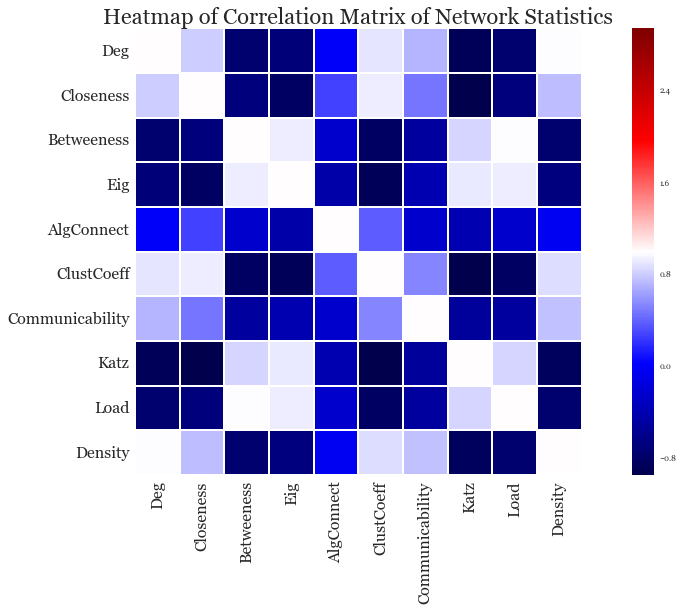

In [90]:
plt.figure(figsize=(18,8))
sns.heatmap(stat_df.corr(), cmap='seismic', center=True, robust=True, fmt='d', linewidths=1, square=True)
plt.title('Heatmap of Correlation Matrix of Network Statistics', fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


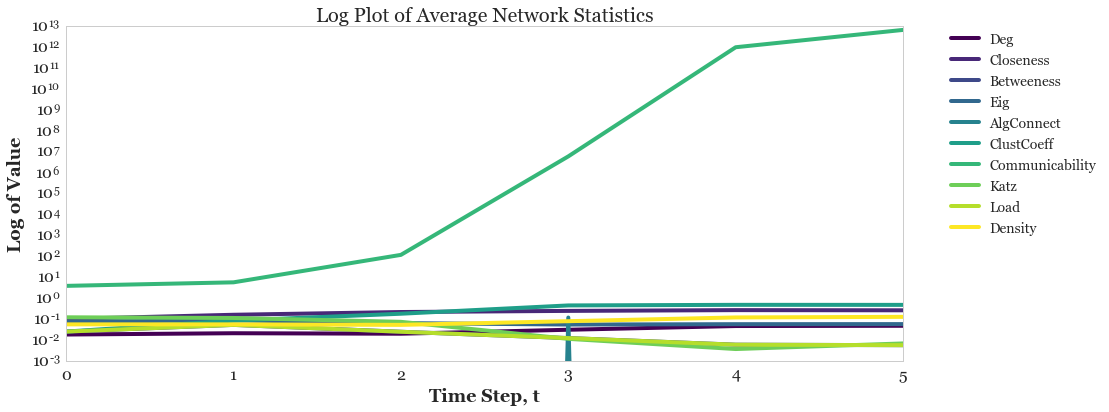

In [91]:
stat_df.plot(colormap='viridis',logy=True, fontsize=14)
plt.title('Log Plot of Average Network Statistics', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(fontsize=14, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Time Step, t", fontsize=18)
plt.ylabel("Log of Value", fontsize=18)

# Assortativity Analysis

In [92]:
def cal_assort_att(net):
    dac = nx.degree_assortativity_coefficient(net)
    dpc = nx.degree_pearson_correlation_coefficient(net)
    avg_neigdeg = nx.average_neighbor_degree(net)
    avg_degconnect = nx.average_degree_connectivity(net)
    triangles = nx.triangles(net)
    
    return [dac,dpc,avg_neigdeg, avg_degconnect,triangles]

In [93]:
dac0 = nx.degree_assortativity_coefficient(Gt0)

In [ ]:
nx.degree_pearson_correlation_coefficient(Gt0)